In [6]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
import sys
from collections import OrderedDict
import numpy as np
import pandas as pd

sys.path.append("../")
from utils import FullIndex, ms_table

#s = 'bcdbaecdcd'
s = open('testing/rnd_200_256.s').read().strip()#[::-1]
t = open('testing/rnd_200_256.t').read().strip()

#s = open('ssss').read().strip()[::-1]
#t = open('tttt').read().strip()

#s_index = FullIndex(s)

/Users/denas/arch/Darwin_x86_64/lib/python/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:

dt = []
checked = set()

a, b = s_index.sa_interval('', FullIndex.FWD)
#print "(0, 0) %s [%d, %d] --> %s" % ('', a, b, s_index.is_maximal_s(''))
dt.append(((0, 0), "", (a, b), s_index.is_maximal_s("")))

for i in range(len(s)):
    for j in range(i + 1, len(s)):
        substr = s[i:j]
        if not s_index.is_node(substr):
            continue
        a, b = s_index.sa_interval(substr, FullIndex.FWD)
        if (a, b) in checked:
            continue

        dt.append(((i, j), substr, (a, b), s_index.is_maximal_s(substr)))
        #print "(%d, %d) %s [%d, %d] --> %s" % (i, j, substr, a, b, s_index.is_maximal_s(substr))
        checked |= set([(a, b)])
        
    #if len(dt) > 25:
    #    break
dd = pd.DataFrame(dt, columns = ["s_idx", "s", "sa_idx", "maximal"])
dd.shape, sum(dd.maximal)

dd[dd.maximal == False]

,s_idx,s,sa_idx,maximal
38,"(20, 23)",eec,"(249, 251)",False
48,"(25, 28)",dca,"(171, 174)",False
49,"(25, 29)",dcab,"(171, 173)",False
80,"(61, 64)",ccd,"(122, 124)",False
112,"(121, 124)",ddd,"(191, 193)",False
114,"(124, 128)",eebc,"(246, 248)",False
122,"(147, 152)",eeedd,"(255, 257)",False
123,"(148, 151)",eed,"(251, 254)",False
124,"(148, 152)",eedd,"(252, 254)",False
128,"(152, 155)",cdb,"(131, 134)",False


In [5]:
#table2(s)#[50:80]
#index_table(s)
#s_index.tabs[FullIndex.FWD].iloc[120:140]

# Repeat text with uniform length repeats

[28]


/Users/denas/arch/Darwin_x86_64/lib/python/site-packages/ipykernel/__main__.py:36: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


Counter({1: 2, 8: 2, 11: 1, 12: 1, 14: 1, 17: 1, 20: 1, 27: 1})

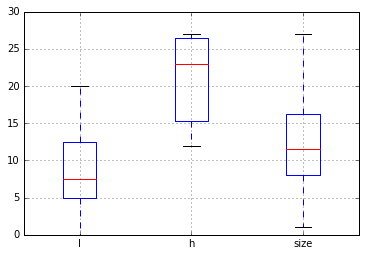

In [20]:
import random
import numpy as np
import pandas as pd


def dump_str(L, seed_pool):
    char_dumped = 0 
    while char_dumped < L:
        seed_str = random.choice(seed_pool)
        n = len(seed_str)

        repeat_length = random.choice(xrange(n))
        repeat_start_position = random.choice(xrange(n - repeat_length))
        assert repeat_length + repeat_start_position <= n
        
        to_write = seed_str[repeat_start_position:(repeat_start_position + repeat_length)]
        char_dumped += len(to_write)
        yield (repeat_start_position, (repeat_start_position + repeat_length))

def _repeat_input_type((t_path, t_len), (s_path, s_len), source,
                       seed_len, seed_nr):
    seed_pool = []
    for seed_idx in range(seed_nr):
        current_seed = "".join([random.choice(source) for i in range(seed_len)])
        seed_pool.append(current_seed)

    with open(t_path, 'w') as fd: 
        dump_str(fd, t_len)
    with open(s_path, 'w') as fd: 
        dump_str(fd, s_len)

seed_pool = ['ababababbababbabababababaaaa']
print map(len, seed_pool)
d = pd.DataFrame(data = list(dump_str(100, seed_pool)), columns = ['l', 'h'])
d['size'] = (d.h - d.l)
d.boxplot()

from collections import Counter
Counter(d['size'].tolist())

In [16]:

random.choice(6)

TypeError: object of type 'int' has no len()